In [1]:
! pip install opencv-python
! pip install sklearn

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import keras
import cv2 as cv
from itertools import chain 



In [3]:
# Load model
model = keras.models.load_model('b_model.h5')

In [4]:
# import images 
import os

# folder path
dir_path = r'C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['00028169_001.png', '00028170_000.png', '00028170_001.png', '00028171_000.png', '00028172_000.png']


In [5]:
p_base = "C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images\\"

In [6]:
images = [ p_base+ res[im] for im in range(len(res))]
images


['C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images\\00028169_001.png',
 'C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images\\00028170_000.png',
 'C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images\\00028170_001.png',
 'C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images\\00028171_000.png',
 'C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images\\00028172_000.png']

In [7]:
"""
# Read an image from a file
image_string = tf.io.read_file(images[0])
# Decode it into a dense vector
image_decoded = tf.image.decode_png(image_string, channels=3)
# Resize it to fixed shape
image_resized = tf.image.resize(image_decoded, [224, 224])
# Normalize Image 
image_normalized = image_resized / 255.0
"""

'\n# Read an image from a file\nimage_string = tf.io.read_file(images[0])\n# Decode it into a dense vector\nimage_decoded = tf.image.decode_png(image_string, channels=3)\n# Resize it to fixed shape\nimage_resized = tf.image.resize(image_decoded, [224, 224])\n# Normalize Image \nimage_normalized = image_resized / 255.0\n'

In [8]:
images[0]

'C:\\Users\\Fabalin\\Class\\CXR-ML\\test_images\\00028169_001.png'

In [9]:
# Define Disease labels 

labels = ['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [10]:
answers = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [11]:
# Function to read the image files and transform them into vectors

def parse_function(filename):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_png(image_string, channels=3)
    
    """# Read Image using the cv module 
    image = cv.imread(str(filename))
    # Perform Histogram equalization across all 3 channels. 
    equalized = histogram_equalization(image)
    # convert to tensors from nparray
    image_decoded = tf.convert_to_tensor(equalized)
    """
    
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [224, 224])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized

In [12]:
# Define constants for the batching and shuffling 

BATCH_SIZE = 32 # Big enough to not crash the processor
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically to reduce GPU and CPU idle time
SHUFFLE_BUFFER_SIZE = 256 # Shuffle the training data by a chunck of 256 observations

In [13]:
# Function to Generate the dataset required

def create_dataset(filenames, is_training=True):
    """Load and parse dataset.
    Args:
        filenames: list of image paths
        labels: numpy array of shape (BATCH_SIZE, N_LABELS)
        is_training: boolean to indicate training mode
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices(filenames)
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_function, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [14]:
test = create_dataset(images, is_training=False)

In [15]:
multi_label_scores = model.predict(test)
print(multi_label_scores) 
print(type(multi_label_scores))

1/1 [==============================] - 2s 2s/step
[[0.05195894 0.01379056 0.02124673 0.00669393 0.05294827 0.03898883
  0.02562794 0.18748173 0.06722365 0.11725803 0.03976782 0.00802926
  0.09923624]
 [0.03974595 0.01281342 0.02168401 0.00654372 0.04803118 0.03399576
  0.02170127 0.20220359 0.05987988 0.10969608 0.03724628 0.00718375
  0.09172378]
 [0.05829826 0.01804977 0.03452988 0.00963531 0.06066149 0.03378437
  0.02089931 0.22636563 0.06047457 0.09765954 0.03808995 0.00970262
  0.08054856]
 [0.04747186 0.01453749 0.02450645 0.007615   0.0528157  0.03597029
  0.02255286 0.21158393 0.06298119 0.11113086 0.03953552 0.00814591
  0.09453798]
 [0.07014253 0.02040025 0.03001217 0.00976724 0.07249578 0.0401987
  0.02380745 0.19981341 0.07228062 0.1047118  0.04311805 0.00979367
  0.09322075]]
<class 'numpy.ndarray'>


In [16]:
# Define the Threshold for positive hits. Currently at 20%

threshold = 0.2

In [17]:
# See Predictions greater than 20% for the provisional model and save to dataframe 
predictions = (multi_label_scores > threshold).astype(int)
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=labels)
results["Filenames"]=res
ordered_cols=["Filenames"]+labels
results=results[ordered_cols]

results

,Filenames,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00028169_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00028170_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0
2,00028170_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0
3,00028171_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0
4,00028172_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Function to take in a dataframe of binary labels from CNN and assign Triage levels in a new column ['Triage']

def triage_classifier(df):

    copy_df = df.copy() # Creates a copy of the dataframe 
    copy_df['Triage'] = np.nan # Creates a new empty column for the triage assignment 
    
    for ind in copy_df.index: # loops through dataframe based on index
        # Emergent = Atelectasis, Consolidation, Edema, Effusion, Infiltration, Pneumothorax
        if (copy_df['Atelectasis'][ind] == 1)\
            or (copy_df['Consolidation'][ind] ==1)\
                or (copy_df['Edema'][ind] == 1)\
                    or (copy_df['Effusion'][ind] == 1)\
                        or (copy_df['Infiltration'][ind] == 1)\
                            or (copy_df['Pneumothorax'][ind] == 1):
                            copy_df['Triage'][ind] = 'Emergent'

        # Acute = Mass, Pneumonia. Hernia is ignored due to insufficient sample size.                    
        elif (copy_df['Mass'][ind] == 1) or (copy_df['Pneumonia'][ind] == 1):
            copy_df['Triage'][ind] = 'Acute'

        # Chronic = Cardiomegaly, Emphysema, Fibrosis, Nodule, Pleural Thickening 
        elif (copy_df['Cardiomegaly'][ind] == 1)\
            or (copy_df['Emphysema'][ind] ==1)\
                or (copy_df['Fibrosis'][ind] == 1)\
                    or (copy_df['Nodule'][ind] == 1)\
                        or (copy_df['Pleural_Thickening'][ind] == 1):
                        copy_df['Triage'][ind] = 'Chronic'
        # If no hits, then 'No Finding' 
        else: 
            copy_df['Triage'][ind] = 'No Finding'

    return copy_df


In [19]:
triaged = triage_classifier(results)

c:\Users\Fabalin\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\Fabalin\Anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
triaged

,Filenames,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Triage
0,00028169_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding
1,00028170_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,Emergent
2,00028170_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,Emergent
3,00028171_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,Emergent
4,00028172_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding


## Model Evaluation 

In [20]:
# Import Dependencies 
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt


In [23]:
package = np.array(results[labels])

In [24]:
eval = f1_score(y_true = answers, y_pred= package, average= 'micro')
eval

0.5714285714285715

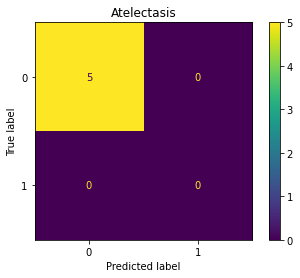

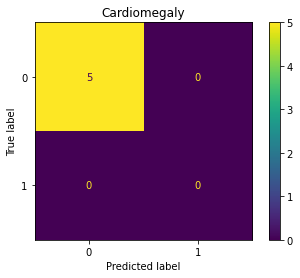

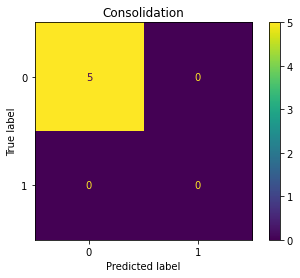

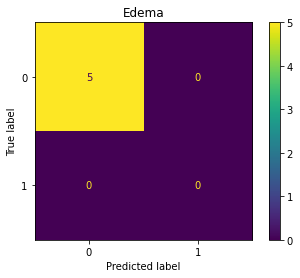

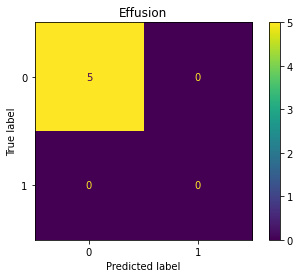

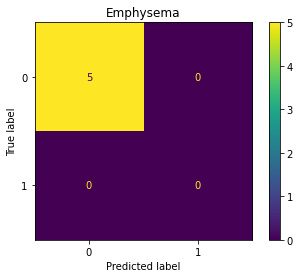

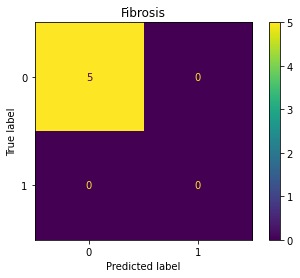

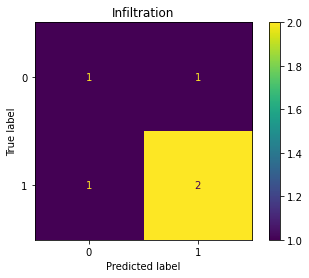

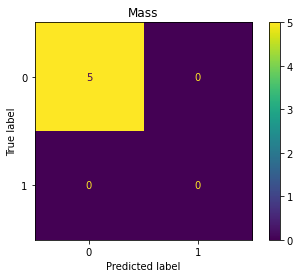

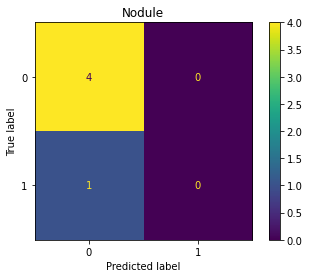

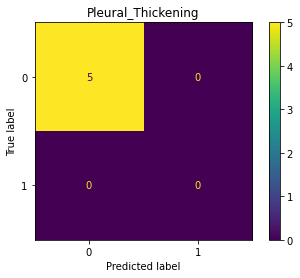

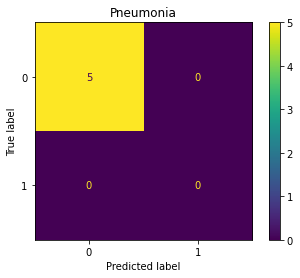

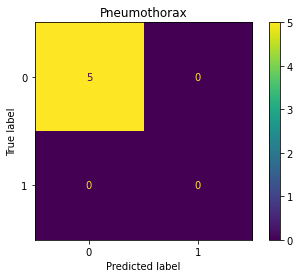

In [25]:

# Create the confusion matrix for each of the labels 
conf_mat = multilabel_confusion_matrix(y_true = answers, y_pred= package)

# Plot the individual confusion matrices for the test sample. 

for i in range(len(conf_mat)):
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat[i])
  disp.plot()
  plt.title(labels[i])
  plt.savefig(f"cm_{labels[i]}")
  plt.show()